In [20]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [13]:
learning_rate = 0.001
training_epochs = 15
batch_size = 64

In [14]:
tf.model = tf.keras.Sequential()

In [15]:
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [16]:
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

In [17]:
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 17s 18ms/step - loss: 0.3445 - accuracy: 0.90320s - loss: 0.3445 - accuracy: 0.90
Epoch 2/15
938/938 [==============================] - 14s 15ms/step - loss: 0.1455 - accuracy: 0.95980s - loss: 

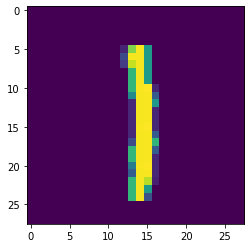

actual y:  1 predicted y:  1


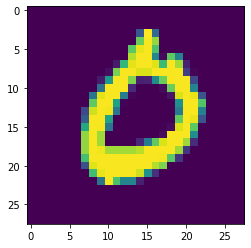

actual y:  0 predicted y:  0


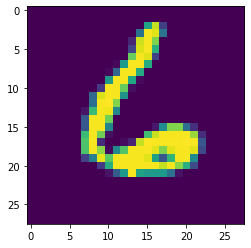

actual y:  6 predicted y:  6


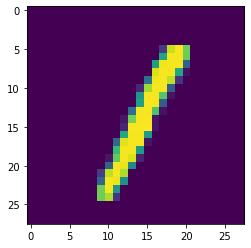

actual y:  1 predicted y:  1


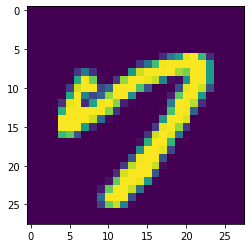

actual y:  7 predicted y:  7


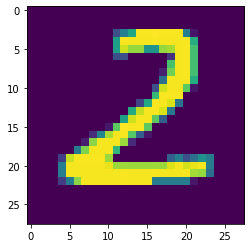

actual y:  2 predicted y:  2


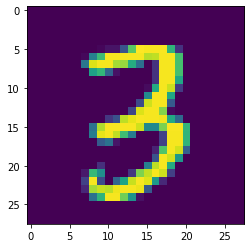

actual y:  3 predicted y:  3


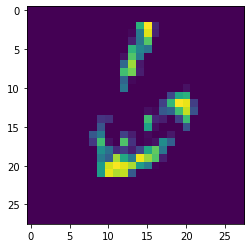

actual y:  6 predicted y:  6


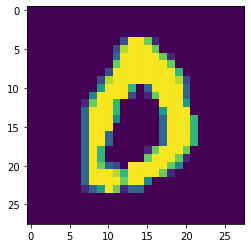

actual y:  0 predicted y:  0


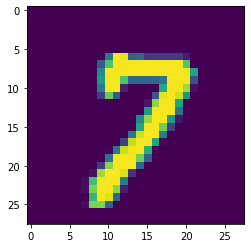

actual y:  7 predicted y:  7
313/313 [==============================] - 2s 5ms/step - loss: 0.0562 - accuracy: 0.9819
loss:  0.056208204478025436
accuracy 0.9818999767303467


In [26]:
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    plt.imshow(x_test[random_index].reshape((28, 28)))
    plt.show()
    print("actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])